In [37]:
import os 
import pandas as pd

log_dir = '/Users/julian/temp/mri_gridsearch_logs'


def get_log_data(log_dir):
    logs = [o for o in os.listdir(log_dir)
                        if o.endswith('.log')]
    
    main_df = pd.DataFrame()
    
    for log in logs:
        log_params = log.split('.log')[0].split('_')
        network_size, batch_size, lr = log_params
        log_path = os.path.join(log_dir, log)
        if os.stat(log_path).st_size == 0: continue
        log_df = pd.read_csv(log_path)
        if log_df.shape[0] < 10: continue
        log_df['network_size'] = int(network_size)
        log_df['batch_size'] = int(batch_size)
        log_df['learning rate'] = float(lr)
        if float(lr) < 0 : print(lr)
        
        main_df = main_df.append(log_df, ignore_index=True)
    
    return main_df

log_data = get_log_data(log_dir)


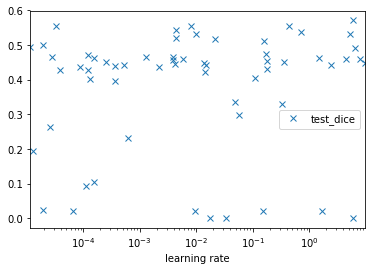

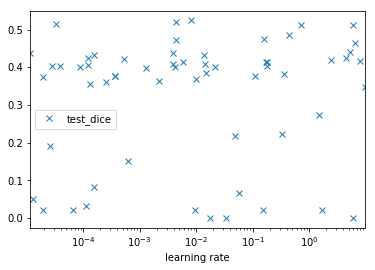

In [38]:
max_lr_df = log_data.groupby('learning rate').max() 
ax = max_lr_df.plot(y='test_dice', style='x', logx=True)

q80_lr_df = log_data.groupby('learning rate').quantile(0.8)
ax = q80_lr_df.plot(y='test_dice', style='x', logx=True)

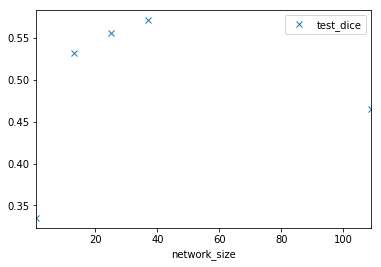

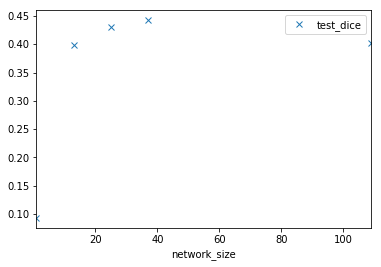

In [39]:
max_nsize_df = log_data.groupby('network_size').max() 
ax = max_nsize_df.plot(y='test_dice', style='x')

q80_nsize_df = log_data.groupby('network_size').quantile(0.8)
ax = q80_nsize_df.plot(y='test_dice', style='x')

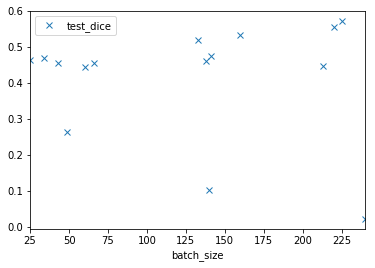

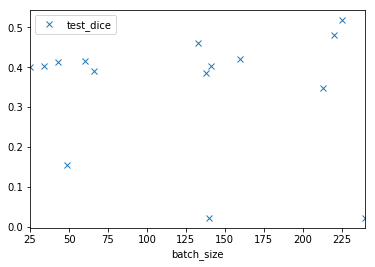

In [40]:
max_batch_size_df = log_data.groupby('batch_size').max() 
ax = max_batch_size_df.plot(y='test_dice', style='x')

q80_batch_size_df = log_data.groupby('batch_size').quantile(0.8)
ax = q80_batch_size_df.plot(y='test_dice', style='x')